In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sys
%matplotlib inline 
import cmath
from pylab import meshgrid, cm, imshow, contour, clabel, colorbar, axis, title, show
import itertools

In [2]:
a = np.arange(-1,4.1,0.1)
lamba = 10 ** a
theta = np.arange(0,91,2)
k = 2 * np.pi /lamba 
C = 100
alpha = 0.002
m = 1 

In [12]:
def TSB_2003(lamba, theta):
    j = 2 * np.pi/lamba
    j2 = j ** 2
    k = j * np.cos(theta * np.pi / 180)
    l = j * np.sin(theta * np.pi / 180)
    ca = 1/np.tan(alpha)
    t9=k**2+l**2;
    m=j;
    t1 = 1+C;
    t3 = np.sinh(m);
    t5 = np.cosh(m);
    t6 = C*m*t3+t5;
    t8 = C**2;
    t27 = ((t1*t6+(1+C+t8*t9)*t5)*m*k)/(m*k*t1*(t5*t6+1+t9*t1)+complex(0,1)*(t6*t3-m)*ca);
    trans=t27;
    return trans

X, Y = np.meshgrid(lamba, theta)
TSB_lt = TSB_2003(X,Y)

#fig, ax = plt.subplots()
#im = plt.imshow(abs(TSB_lt), cmap='viridis', aspect = 'auto',origin = 'lower', extent = (min(a),max(a),min(theta),max(theta)))
#cset = contour(abs(TSB_lt), np.arange(0,1.1,0.05), linewidths = 0.2, extent = (min(a),max(a),min(theta),max(theta)), colors='k')
#plt.xlabel(r'$log_{10} (\lambda)\ \ (\overline{h})$');
#plt.ylabel(r'$\theta $   (deg)');
#colorbar(im);

In [13]:
def TUB_2003(lamba, theta):
    j = 2 * np.pi/lamba
    j2 = j ** 2
    k = j * np.cos(theta * np.pi / 180)
    l = j * np.sin(theta * np.pi / 180)
    ca = 1/np.tan(alpha)
    t9=k**2+l**2;
    m=j
    if np.max(m) > 220:
        print(' T_UB_3vcs : j this large has been known in the past to cause numerical overflow problems ')
    t1 = 1+C;
    t3 = k**2;
    t7 = m**2;
    t8 = t7**2;
    t11 = C**2;
    t16 = t3*t1;
    t20 = t11*t7;
    t29 = np.sinh(m);
    t31 = np.cosh(m);
    t44 = t7*m;
    t51 = t11*t3;
    t52 = 2+C;
    t56 = t52**2;
    t62 = t29**2;
    t85 = t31**2;
    t101 = t7*t1;
    t118 = ((complex(0,1)*((3*C*t1*t3-4)*k*t8*C+2*(((4*C+2+t11)*t3+4+4*C)*t7-2*t16)*k)+\
             (((-t20-4-C)*t3+2)*C+4)*t7*ca)*t29*t31+(complex(0,1)*(((t16+2)*t11*t7*C+\
                C*(5*C+4)*t3+2*(3*C-2)*t1)*k*t44-4.*t3*k*m*t1*C)+((-3*t51+2*C*t52)*t7-\
                t3*t56)*m*ca)*t62+2*(-t51-C-2)*t44*ca+2*complex(0,1)*(-(2+5*C+4*t11)*t8+\
                ((5*t11+6*C+2)*t3-4-4*C)*t7+2*t16)*k*m)/t7/((complex(0,1)*(t20+2)*k*t1-\
             3*C*ca)*m*t85*t31+((2+3*C)*ca-complex(0,1)*((-2-2*C+t11)*t7-2)*k*t1)*m*t31+\
            ((-2-t20)*ca+3*complex(0,1)*C*k*t101)*t62*t29+((t7*C-2)*ca+complex(0,1)*(t101+\
                                                                4)*C*t1*k*t7)*t29);
    trans=t118;
    return trans

X, Y = np.meshgrid(lamba, theta)
TUB_lt = TUB_2003(X,Y)

#fig, ax = plt.subplots()
#im = plt.imshow(abs(TUB_lt), cmap='viridis', aspect = 'auto',origin = 'lower', extent = (min(a),max(a),min(theta),max(theta)))
#cset = contour(abs(TUB_lt), np.arange(0,100,5), linewidths = 0.2, extent = (min(a),max(a),min(theta),max(theta)), colors='k')
#plt.xlabel(r'$log_{10} (\lambda)\ \ (\overline{h})$');
#plt.ylabel(r'$\theta $   (deg)');
#colorbar(im);

In [14]:
def TVB_2003(lamba, theta):
    j = 2 * np.pi/lamba
    j2 = j ** 2
    k = j * np.cos(theta * np.pi / 180)
    l = j * np.sin(theta * np.pi / 180)
    ca = 1/np.tan(alpha)
    
    t3=k**2+l**2;
    m=j;
    t2 = C**2;
    t3 = m**2;
    t4 = t2*t3;
    t9 = 1+C;
    t11 = t3**2;
    t18 = np.sinh(m);
    t20 = np.cosh(m);
    t23 = (2+C)**2;
    t38 = t18**2;
    t59 = t20**2;
    t75 = t3*t9;
    
    t93 = k*l*(((-t4-4-C)*t3*C*ca+complex(0,1)*(3*t2*t9*t11+2*(4*C+2+t2)*t3-4-4*C)*k)*t18*t20+\
               ((-3*t4-t23)*m*ca+complex(0,1)*(t2*C*t9*t11+C*(5*C+4)*t3-4*C*t9)*k*m)*t38-2*t2*t3*m*ca+\
               2*complex(0,1)*k*m*((C*(5*C+6)+2)*t3+2+2*C))/t3/((complex(0,1)*(t4+2)*k*t9-\
                3*C*ca)*m*t59*t20+((2+3*C)*ca-complex(0,1)*((-2-2*C+t2)*t3-2)*k*t9)*m*t20+\
            ((-2-t4)*ca+3*complex(0,1)*C*k*t75)*t38*t18+((t3*C-2)*ca+complex(0,1)*(t75+\
                                                                                4)*C*t9*k*t3)*t18);
    trans=t93;
    return trans

X, Y = np.meshgrid(lamba, theta)
TVB_lt = TVB_2003(X,Y)

#fig, ax = plt.subplots()
#im = plt.imshow(abs(TVB_lt), cmap='viridis', aspect = 'auto',origin = 'lower', extent = (min(a),max(a),min(theta),max(theta)))
#cset = contour(abs(TVB_lt), np.arange(0,100,5), linewidths = 0.2, extent = (min(a),max(a),min(theta),max(theta)), colors='k')
#plt.xlabel(r'$log_{10} (\lambda)\ \ (\overline{h})$');
#plt.ylabel(r'$\theta $   (deg)');
#colorbar(im);

In [15]:
def TSC_2003(lamba, theta):
    j = 2 * np.pi/lamba
    j2 = j ** 2
    k = j * np.cos(theta * np.pi / 180)
    l = j * np.sin(theta * np.pi / 180)
    ca = 1/np.tan(alpha)
    
    t11=k**2+l**2;
    m=j;

    t2 = np.cosh(m);
    t5 = 1.0+C;
    t7 = np.sinh(m);
    t9 = C*m*t7+t2;
    t23 = -C*k*m*t2/(t5*m*k*(t2*t9+1+t11*t5)+complex(0,1)*(t9*t7-m)*ca);
    trans=t23;
    return trans

X, Y = np.meshgrid(lamba, theta)
TSC_lt = TSC_2003(X,Y)

#fig, ax = plt.subplots()
#im = plt.imshow(abs(TSC_lt), cmap='viridis', aspect = 'auto',origin = 'lower', extent = (min(a),max(a),min(theta),max(theta)))
#cset = contour(abs(TSC_lt), np.arange(0,0.5,0.1), linewidths = 0.2, extent = (min(a),max(a),min(theta),max(theta)), colors='k')
#plt.xlabel(r'$log_{10} (\lambda)\ \ (\overline{h})$');
#plt.ylabel(r'$\theta $   (deg)');
#colorbar(im);

In [16]:
def TUC_2003(lamba, theta):
    j = 2 * np.pi/lamba
    j2 = j ** 2
    k = j * np.cos(theta * np.pi / 180)
    l = j * np.sin(theta * np.pi / 180)
    ca = 1/np.tan(alpha)
    
    t4=k**2+l**2;
    m=j;
 
    t1 = k**2;
    t2 = C*t1;
    t7 = 1+C;
    t8 = t7*C;
    t9 = t4**2;
    t11 = 2+C;
    t19 = np.sinh(m);
    t21 = np.cosh(m);
    t23 = t4*C;
    t34 = t19**2;
    t37 = t7**2;
    t49 = C**2;
    t50 = t49*t4;
    t57 = t21**2;
    t73 = t7*t4;
    t90 = C*(((t2-2)*t4*ca+complex(0,1)*k*(2*t8*t9-(t11*t7*t1+4)*t4+2*t1))*t19*t21+\
             m*((-2*t23+t1*t11)*ca+complex(0,1)*k*((-t8*t1+2)*t4+t2))*t34+\
             2*m*(t4*ca+complex(0,1)*k*(t37*t9+\
         (-t37*t1+2+C)*t4-t1)))/t4/((complex(0,1)*(t50+2)*k*t7-3*C*ca)*m*t57*t21+((2+3*C)*ca-\
        complex(0,1)*((-2-2*C+t49)*t4-2)*k*t7)*m*t21+((-2-t50)*ca+3*complex(0,1)*C*k*t73)*t34*t19+\
                                    ((t23-2)*ca+complex(0,1)*C*t7*(t73+4)*k*t4)*t19);
    trans=t90;
    return trans
    
X, Y = np.meshgrid(lamba, theta)
TUC_lt = TUC_2003(X,Y)

#fig, ax = plt.subplots()
#im = plt.imshow(abs(TUC_lt), cmap='viridis', aspect = 'auto',origin = 'lower', extent = (min(a),max(a),min(theta),max(theta)))
#cset = contour(abs(TUC_lt), np.arange(0,100,5), linewidths = 0.2, extent = (min(a),max(a),min(theta),max(theta)), colors='k')
#plt.xlabel(r'$log_{10} (\lambda)\ \ (\overline{h})$');
#plt.ylabel(r'$\theta $   (deg)');
#colorbar(im);

In [17]:
def TVC_2003(lamba, theta):
    j = 2 * np.pi/lamba
    j2 = j ** 2
    k = j * np.cos(theta * np.pi / 180)
    l = j * np.sin(theta * np.pi / 180)
    ca = 1/np.tan(alpha)
    
    t3=k**2+l**2;
    m=j;

    t1 = C*k;
    t4 = t3*C;
    t7 = 1+C;
    t13 = np.sinh(m);
    t15 = np.cosh(m);
    t20 = t3*t7;
    t26 = t13**2;
    t28 = t7**2;
    t36 = C**2;
    t37 = t36*t3;
    t44 = t15**2;
    t76 = -t1*l*((-t4*ca+complex(0,1)*((2+C)*t7*t3-2)*k)*t13*t15+((-2-C)*m*ca+\
         complex(0,1)*(t20-1)*k*m*C)*t26+2*complex(0,1)*(t3*t28+1)*m*k)/t3/((complex(0,1)*(t37+\
        2)*k*t7-3*C*ca)*m*t44*t15+((2+3*C)*ca-complex(0,1)*((-2-2*C+t36)*t3-2)*k*t7)*m*t15+\
            ((-2-t37)*ca+3*complex(0,1)*t1*t20)*t26*t13+((t4-2)*ca+\
                                                        complex(0,1)*C*t7*(t20+4)*k*t3)*t13);
    trans=t76;
    return trans

X, Y = np.meshgrid(lamba, theta)
TVC_lt = TVC_2003(X,Y)

#fig, ax = plt.subplots()
#im = plt.imshow(abs(TVC_lt), cmap='viridis', aspect = 'auto',origin = 'lower', extent = (min(a),max(a),min(theta),max(theta)))
#cset = contour(abs(TVC_lt), np.arange(0,100,5), linewidths = 0.2, extent = (min(a),max(a),min(theta),max(theta)), colors='k')
#plt.xlabel(r'$log_{10} (\lambda)\ \ (\overline{h})$');
#plt.ylabel(r'$\theta $   (deg)');
#colorbar(im);

In [18]:
a2, theta2 = np.meshgrid(a,theta)

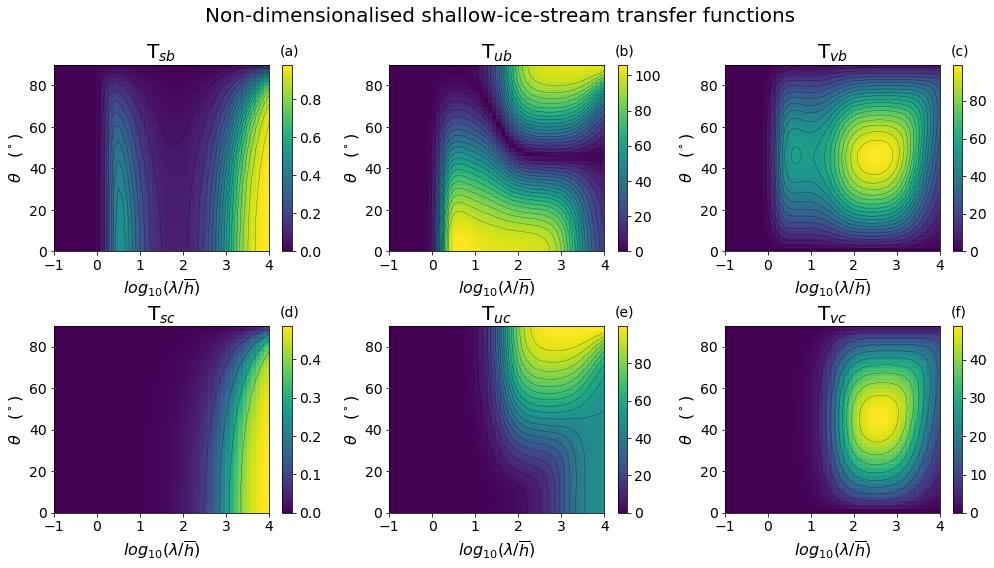

In [19]:
fig, ax = plt.subplots(2,3, figsize = (14,8))
im = [[None] * 3, [None] * 3]
cset = [[None] * 3, [None] * 3]
cb = [[None] * 3, [None] * 3]
plts = [[abs(TSB_lt),abs(TUB_lt),abs(TVB_lt)],[abs(TSC_lt),abs(TUC_lt),abs(TVC_lt)]]
levels = [[np.arange(0,1.1,0.05),np.arange(0,100,5),np.arange(0,100,5)],\
          [np.arange(0,0.5,0.1),np.arange(0,100,5),np.arange(0,100,5)]]
titles = [['T$_{sb}$','T$_{ub}$','T$_{vb}$'],['T$_{sc}$','T$_{uc}$','T$_{vc}$']]
sub_labels = [['(a)','(b)','(c)'],['(d)','(e)','(f)']]
for i, j in itertools.product(range(2), range(3)):
    im[i][j] = ax[i][j].pcolor(a2, theta2, plts[i][j])
    cset[i][j] = ax[i][j].contour(a2, theta2, plts[i][j],levels[i][j], linewidths = 0.2, colors = 'k')
    ax[i,j].set_xlabel(r'$log_{10} (\lambda / \overline{h} )$', fontsize = 16);
    ax[i,j].set_ylabel(r'$\theta $   ($^\circ$)', fontsize = 16);
    cb[i][j] = plt.colorbar(im[i][j], ax = ax[i,j])
    ax[i,j].set_title(titles[i][j], fontsize = 20)
    ax[i,j].tick_params(axis='both', which='major', labelsize=14)
    ax[i,j].tick_params(axis='both', which='minor', labelsize=14)
    ax[i,j].annotate(sub_labels[i][j], xy = (1.05,1.05), xycoords = 'axes fraction', fontsize = 14)
    for t in cb[i][j].ax.get_yticklabels():
         t.set_fontsize(14)
fig.suptitle('Non-dimensionalised shallow-ice-stream transfer functions', fontsize = 20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
fig.savefig('Transfer_functions_2003.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')
fig.savefig('Transfer_functions_2003.pdf', bbox_inches = 'tight', dpi = 200, facecolor = 'none')